In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2021-12-29 19:02:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  37.3MB/s    in 0.4s    

2021-12-29 19:02:45 (37.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
model_tb = tf.keras.callbacks.TensorBoard(log_dir='lab8-logs-inceptionv3-keras')
model_tb.set_model(model)

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

In [ ]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  
    img_decode = tf.image.decode_image(img_string)  
    img_decode = tf.image.resize(img_decode, resize) 
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

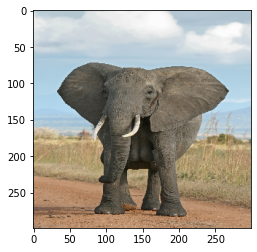

In [ ]:
img_path = 'drive/MyDrive/image/elephant.jpg'
img = read_img(img_path) 
plt.imshow(tf.cast(img, tf.uint8)[0])

In [ ]:
img = preprocess_input(img)  
preds = model.predict(img) 
print("Predicted:", decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.80378544), ('n01871265', 'tusker', 0.12163988), ('n02504013', 'Indian_elephant', 0.004299275)]


In [ ]:
pip install tensorflow-hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/tf2-preview/inception_v3/classification/4"

model = tf.keras.Sequential([
    hub.KerasLayer(module_url, 
                  input_shape=(299, 299, 3),  
                   output_shape=(1001, ),   
                   name='Inception_v3')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inception_v3 (KerasLayer)   (None, 1001)              23853833  
                                                                 
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


In [ ]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  
    img_decode = tf.image.decode_image(img_string)  
    img_decode = tf.image.resize(img_decode, resize)  
    img_decode = img_decode / 255.0  
    img_decode = tf.expand_dims(img_decode, axis=0)  # 
    return img_decode

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

with open(labels_path) as file:
    lines = file.read().splitlines()
print(lines)  

imagenet_labels = np.array(lines) 

24576/10484 [======================================================================] - 0s 0us/step
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snak

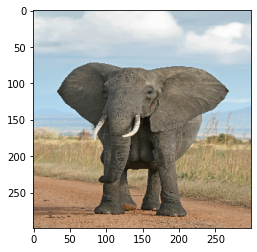

In [ ]:
img_path = 'drive/MyDrive/image/elephant.jpg'
img = read_img(img_path)  # 透過剛創建的函式讀取影像
plt.imshow(img[0])

In [ ]:
preds = model.predict(img) 
index = np.argmax(preds) 
print("Predicted:", imagenet_labels[index])

Predicted: African elephant


In [ ]:
top3_indexs = np.argsort(preds)[0, ::-1][:3]  
print("Predicted:", imagenet_labels[top3_indexs]) 

Predicted: ['African elephant' 'tusker' 'Indian elephant']
